In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/manishanker/statistics_ML_jan_2020/master/bank.csv",sep=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19.0,oct,79.0,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11.0,may,220.0,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16.0,apr,185.0,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3.0,jun,199.0,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5.0,may,226.0,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30.0,jul,329.0,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9.0,may,153.0,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19.0,aug,151.0,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6.0,feb,129.0,4,211,3,other,no


In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19.0,oct,79.0,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11.0,may,220.0,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16.0,apr,185.0,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3.0,jun,199.0,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5.0,may,226.0,1,-1,0,unknown,no


In [5]:
df["balance"] = pd.to_numeric(df["balance"], errors='coerce')
#df['balance']=df['balance'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4518 non-null object
marital      4518 non-null object
education    4518 non-null object
default      4521 non-null object
balance      4518 non-null float64
housing      4520 non-null object
loan         4521 non-null object
contact      4518 non-null object
day          4520 non-null float64
month        4521 non-null object
duration     4519 non-null float64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4518 non-null object
dtypes: float64(3), int64(4), object(10)
memory usage: 600.6+ KB


In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4518.000000,4520.000000,4519.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.268260,15.915487,263.984952,2.793630,39.766645,0.542579
std,10.576211,3010.059974,8.248569,259.896301,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1479.250000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
df.shape

(4521, 17)

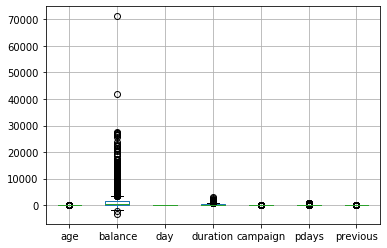

In [9]:
df.boxplot()

In [10]:
df.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown', nan], dtype=object)

In [11]:
df.marital.unique()

array(['married', 'single', 'divorced', nan], dtype=object)

In [12]:
df.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown', nan, 'na'],
      dtype=object)

In [13]:
df.var()

age         1.118562e+02
balance     9.060461e+06
day         6.803888e+01
duration    6.754609e+04
campaign    9.670897e+00
pdays       1.002424e+04
previous    2.868153e+00
dtype: float64

In [14]:
df.balance.median()

444.0

In [15]:
df['balance'].fillna((df['balance'].median()),inplace=True)

In [16]:
df['day'].fillna(15,inplace=True)

In [17]:
df['housing'].value_counts()

yes    2558
no     1962
Name: housing, dtype: int64

In [18]:
df.housing.mode()

0    yes
dtype: object

In [19]:
df["housing"].fillna('yes', inplace = True) 

In [20]:
df['y'].mode()

0    no
dtype: object

In [21]:
df['y'].fillna('no',inplace=True)

In [22]:
df.duration.mode()

0    123.0
dtype: float64

In [23]:
df['duration'].fillna((df['duration'].median()),inplace=True)

In [24]:
df.isnull().sum()

age          0
job          3
marital      3
education    3
default      0
balance      0
housing      0
loan         0
contact      3
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [25]:
df['default'] = pd.get_dummies(df['default'],drop_first=True)
df['default']
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787.0,no,no,cellular,19.0,oct,79.0,1,-1,0,unknown,no
1,33,services,married,secondary,0,4789.0,yes,yes,cellular,11.0,may,220.0,1,339,4,failure,no
2,35,management,single,tertiary,0,1350.0,yes,no,cellular,16.0,apr,185.0,1,330,1,failure,no
3,30,management,married,tertiary,0,1476.0,yes,yes,unknown,3.0,jun,199.0,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,0,0.0,yes,no,unknown,5.0,may,226.0,1,-1,0,unknown,no


In [26]:
df['housing']=pd.get_dummies(df['housing'],drop_first=True)


In [27]:
df['loan']=pd.get_dummies(df['loan'],drop_first=True)


In [28]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [29]:
df['poutcome']=label_encoder.fit_transform(df['poutcome'])


In [30]:
df['job'].fillna('unknown',inplace=True)
df.job.isnull().sum()

0

In [31]:
df['marital'].fillna('unknown',inplace=True)

In [32]:
df['education'].fillna('unknown',inplace=True)

In [33]:
df['job']=label_encoder.fit_transform(df['job'])
df['marital']=label_encoder.fit_transform(df['marital'])
df['education']=label_encoder.fit_transform(df['education'])

In [34]:
df['month']=pd.to_datetime(df.month, format='%b').dt.month


In [35]:
df['duration'].fillna(df['duration'].median(),inplace=True)


In [36]:
df=df.drop(['contact'],axis=1)


In [37]:
df.head()


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,1,0,1787.0,0,0,19.0,10,79.0,1,-1,0,3,no
1,33,7,1,2,0,4789.0,1,1,11.0,5,220.0,1,339,4,0,no
2,35,4,2,3,0,1350.0,1,0,16.0,4,185.0,1,330,1,0,no
3,30,4,1,3,0,1476.0,1,1,3.0,6,199.0,4,-1,0,3,no
4,59,1,1,2,0,0.0,1,0,5.0,5,226.0,1,-1,0,3,no


In [38]:
df['y']=df['y'].replace({'yEs': 'yes', 'Yes': 'yes', 'NO': 'no', 'No':'no'})

df.y.unique()


array(['no', 'yes'], dtype=object)

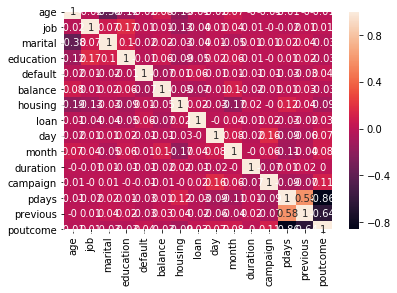

In [39]:
corr_mat=df.corr().round(2)
sns.heatmap(corr_mat,annot=True)


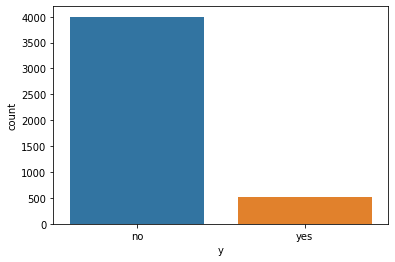

In [66]:
sns.countplot("y", data=df )

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree


In [41]:
X=df.drop(['y'],axis=1)#Features
y=df['y']#Target Variable

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=None)


In [43]:
#Create a decisiontree classiier

clf=DecisionTreeClassifier()

#Train Decision Tree classifier

clf=clf.fit(X_train,y_train)

#predict the response from test dataset

y_pred=clf.predict(X_test)




In [44]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred))



accuracy: 0.868828297715549


In [45]:
y_test.unique()


array(['no', 'yes'], dtype=object)

In [46]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          no       0.93      0.92      0.93      1213
         yes       0.39      0.42      0.40       144

    accuracy                           0.87      1357
   macro avg       0.66      0.67      0.66      1357
weighted avg       0.87      0.87      0.87      1357



In [47]:
y_test.value_counts()

no     1213
yes     144
Name: y, dtype: int64

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

accuracy: 0.8953574060427414


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94      1213
         yes       0.51      0.24      0.33       144

    accuracy                           0.90      1357
   macro avg       0.72      0.61      0.64      1357
weighted avg       0.87      0.90      0.88      1357



In [52]:
from collections import Counter
Counter(y_pred)

Counter({'no': 1289, 'yes': 68})

In [53]:
from sklearn.ensemble import RandomForestClassifier
clf_randomforest=RandomForestClassifier(n_estimators=170)
clf_randomforest.fit(X_train,y_train)
y_pred=clf_randomforest.predict(X_test)

In [54]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

accuracy: 0.9071481208548269


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95      1213
         yes       0.62      0.31      0.42       144

    accuracy                           0.91      1357
   macro avg       0.77      0.65      0.68      1357
weighted avg       0.89      0.91      0.89      1357



In [56]:
from sklearn.svm import SVC

In [57]:
clf_svm=SVC()
clf_svm.fit(X_train,y_train)
y_pred=clf_svm.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [58]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

accuracy: 0.8938835666912307


In [62]:
clf_svm1=SVC(C=5)
clf_svm1.fit(X_train,y_train)
y_pred=clf_svm1.predict(X_test)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [63]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred))


accuracy: 0.8938835666912307


In [64]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

          no       0.89      1.00      0.94      1213
         yes       0.00      0.00      0.00       144

    accuracy                           0.89      1357
   macro avg       0.45      0.50      0.47      1357
weighted avg       0.80      0.89      0.84      1357



/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
